In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import pandas as pd



In [3]:
data = pd.read_csv('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
data


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,kTurROKp5YHQ,0.022932,0.024830,-0.006514,0.021070,0.093365,0.083369,0.010991,0.035838,0.023909,...,0.060060,-0.003911,-0.016413,0.089110,0.118587,-0.060868,0.124443,0.028510,0.113064,0.103809
1209,FCRyMz9O6yCq,0.047078,0.135955,0.144366,0.054938,0.065760,0.113550,0.032621,0.025349,0.011848,...,0.021318,0.020141,-0.020920,0.030450,0.190241,0.026461,-0.011593,0.139483,-0.064480,0.070354
1210,vm2P1hmAY1hl,0.094541,0.145280,0.061964,0.030562,0.078278,0.105857,0.043984,0.039145,0.032024,...,-0.052990,-0.002118,-0.038452,0.066608,0.143446,0.051221,0.127495,0.106242,-0.036065,0.151341
1211,OFxvN8lnw21w,-0.001533,0.128562,0.045000,-0.008742,0.003673,0.086494,0.090101,-0.037449,-0.026334,...,0.024479,-0.036995,-0.061617,-0.001699,0.106568,0.023427,-0.003520,0.174972,0.041198,0.152029


In [4]:
file_path_trainCAT = "/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"
train_cat = pd.read_excel(file_path_trainCAT)
train_cat

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45


In [5]:
file_path_trainQUAN = "/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
train_quan = pd.read_excel(file_path_trainQUAN)
train_quan

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,NaN
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094


In [6]:
train_quan.shape

(1213, 19)

In [7]:
train_cat.shape

(1213, 10)

In [8]:
data.shape

(1213, 19901)

In [9]:
print(data.isnull().sum())  


participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [10]:
print(train_quan.isnull().sum())  


participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [11]:
# Replace missing values for quan with median since removing the values would mean removing 30% of the data
train_quan['MRI_Track_Age_at_Scan'] = train_quan['MRI_Track_Age_at_Scan'].fillna(train_quan['MRI_Track_Age_at_Scan'].median())
print(train_quan.isnull().sum())  


participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


In [12]:
print(train_cat.isnull().sum())  

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [14]:
train_cat['PreInt_Demos_Fam_Child_Ethnicity'] = train_cat['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_cat['PreInt_Demos_Fam_Child_Ethnicity'].median())

In [15]:
train_merged_df1 = pd.merge(train_quan, train_cat, on='participant_id')
train_final_merged_df = pd.merge(train_merged_df1, data, on='participant_id')

# ensure it looks accurate
train_final_merged_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.037630,-0.072599,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,0.014106,-0.001084,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,-0.040456,0.018640,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.016356,0.025618,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.056285,-0.031508,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666


In [ ]:
train_final_merged_df

In [16]:

print(f"Dataset shape: {train_final_merged_df.shape}")
print(f"Data types:\n{train_final_merged_df.dtypes.value_counts()}")


Dataset shape: (1213, 19928)
Data types:
float64    19903
int64         24
object         1
Name: count, dtype: int64


In [18]:
print(train_final_merged_df.describe())

       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000000        0.000000        0.000000   
25%        45.600000             14.000000        3.000000       11.000000   
50%        76.670000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1213.000000      1213.000000     1213.000000     1213.000000   
mean         39.374279        17.785655       16.393240       25.246496   
std           6.245928         3.764112        5.376994        3.950529 

In [20]:
train_final_merged_df['EHQ_EHQ_Total'].value_counts()


EHQ_EHQ_Total
 100.00    252
 86.67      85
 73.34      71
 93.34      71
 80.00      54
          ... 
 38.94       1
-58.94       1
 23.33       1
-47.87       1
-57.80       1
Name: count, Length: 158, dtype: int64


Most participants have a higher EHQ_EHQ_Total score, which suggests that they tend to be more right-handed.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


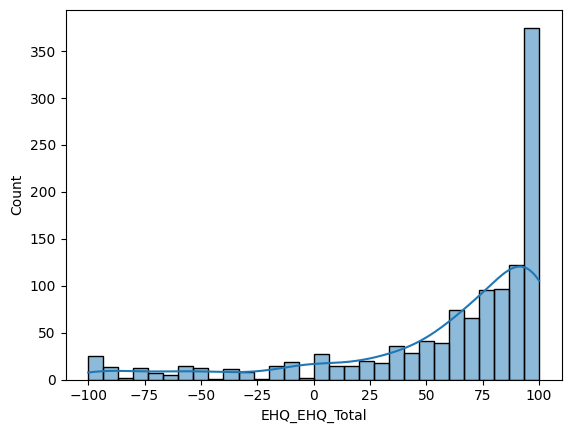

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_final_merged_df['EHQ_EHQ_Total'], bins=30, kde=True)
plt.show()

                            EHQ_EHQ_Total  ColorVision_CV_Score  \
EHQ_EHQ_Total                    1.000000              0.027679   
ColorVision_CV_Score             0.027679              1.000000   
APQ_P_APQ_P_CP                  -0.013414              0.066965   
APQ_P_APQ_P_ID                   0.019131              0.022960   
APQ_P_APQ_P_INV                  0.033819              0.007465   
APQ_P_APQ_P_OPD                 -0.012423              0.023402   
APQ_P_APQ_P_PM                   0.049200             -0.013446   
APQ_P_APQ_P_PP                   0.020321              0.029796   
SDQ_SDQ_Conduct_Problems        -0.051240              0.016444   
SDQ_SDQ_Difficulties_Total      -0.054827              0.000335   
SDQ_SDQ_Emotional_Problems      -0.034221              0.010199   
SDQ_SDQ_Externalizing           -0.028900              0.005308   
SDQ_SDQ_Generating_Impact       -0.014712              0.051282   
SDQ_SDQ_Hyperactivity           -0.005902             -0.00393

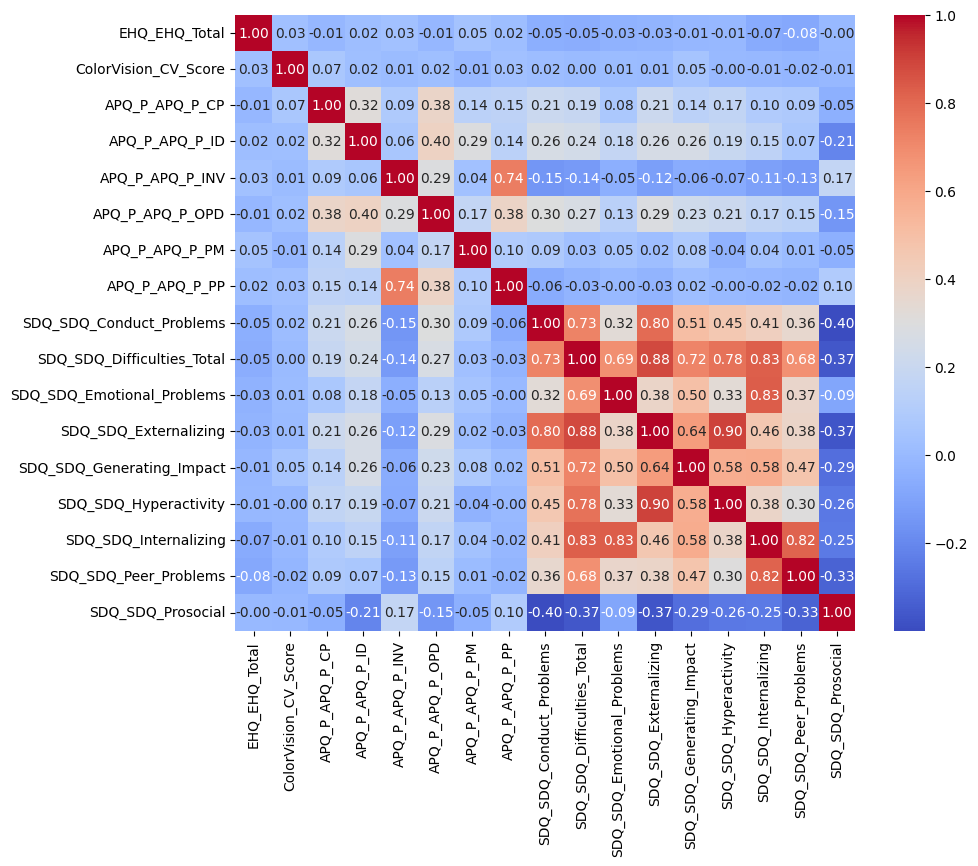

In [25]:

import pandas as pd


numerical_columns = [
    'EHQ_EHQ_Total',
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
   
]


df_numerical = train_final_merged_df[numerical_columns]


corr_matrix = df_numerical.corr()


print(corr_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



The heatmap shows that when a child scores high on one type of behavioral difficulty (like emotional problems), they're likely to score high on others too (like conduct problems or hyperactivity).
Behavorial issues and vision issues do not have much colleration with each other.

In [37]:

from scipy.stats import zscore


#finding outliers

z_scores = zscore(train_final_merged_df['EHQ_EHQ_Total'])
z_scores

0      -0.378789
1      -3.077096
2      -2.117930
3      -1.716806
4      -1.181438
          ...   
1208    0.580378
1209    0.379715
1210   -0.846733
1211   -0.109901
1212   -2.341267
Name: EHQ_EHQ_Total, Length: 1213, dtype: float64

In [35]:
index_of_outlier = np.where(np.isclose(z_scores, -3.077096))[0]

# Retrieve the raw data corresponding to the index
outlier_data = train_final_merged_df.iloc[index_of_outlier]

# Print the raw data (EHQ_EHQ_Total and corresponding Z-score)
print(outlier_data[['EHQ_EHQ_Total']])

   EHQ_EHQ_Total
1         -94.47


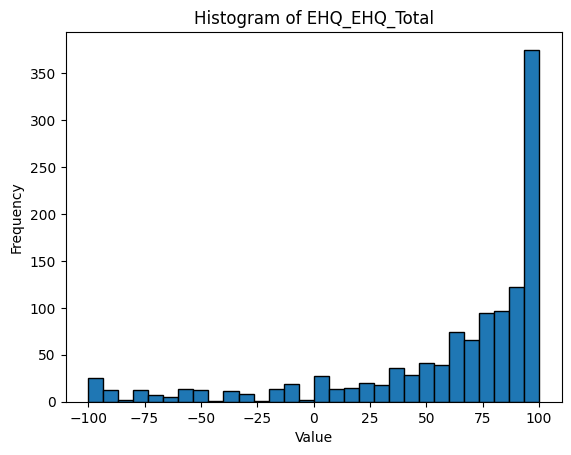

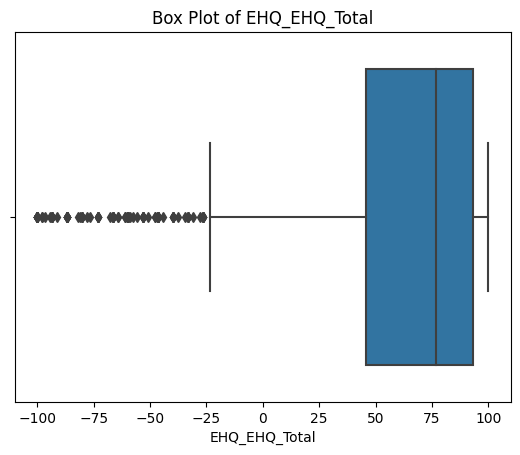

In [36]:

plt.hist(train_final_merged_df['EHQ_EHQ_Total'], bins=30, edgecolor='black')
plt.title("Histogram of EHQ_EHQ_Total")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


sns.boxplot(x=train_final_merged_df['EHQ_EHQ_Total'])
plt.title("Box Plot of EHQ_EHQ_Total")
plt.show()

In [41]:
numeric_columns = train_final_merged_df.select_dtypes(include=['number'])

# Apply zscore to numeric columns only


z_scores_all = numeric_columns.apply(zscore)
z_scores_all

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,-0.378789,-0.059321,-0.567920,-0.841235,1.221414,-1.271915,-1.003435,0.697284,-1.018229,-0.931301,...,-0.981736,-1.454531,-1.259669,-0.910340,0.483945,-1.091363,0.864890,1.004191,0.065975,-2.290738
1,-3.077096,0.300459,-0.567920,-0.053875,-0.860800,0.056968,1.229216,1.203754,-1.018229,0.893934,...,0.061102,0.082861,-0.495452,-0.706108,0.820252,0.337998,-0.710979,-0.084920,-0.436274,1.119221
2,-2.117930,0.300459,0.158754,-0.841235,-0.700630,-0.474585,-1.189489,0.950519,-0.523789,0.285522,...,-1.038701,0.506867,0.353263,-0.969341,0.231415,-0.052323,0.512291,0.965598,-1.703583,-1.604286
3,-1.716806,-1.138660,0.885428,-0.316329,-0.059948,0.322744,-0.073164,0.697284,1.948413,1.806551,...,-0.552910,0.656873,-0.064687,0.653403,0.114786,-0.094788,1.670754,0.243527,-0.414866,1.808976
4,-1.181438,0.300459,0.885428,0.471031,0.100222,0.588521,1.415270,0.697284,-0.523789,0.893934,...,-1.357752,-0.571181,-0.135685,0.717809,-0.703857,-0.375744,-0.563803,0.452114,0.398520,0.251772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.580378,0.300459,0.885428,0.208578,-0.059948,0.588521,-0.259218,-1.075362,-0.523789,-0.474993,...,-1.000592,-0.583806,0.821544,-0.241722,1.721009,0.993129,-0.066847,0.143663,1.216575,0.356897
1209,0.379715,0.300459,-0.567920,-0.841235,-1.181141,0.588521,-1.003435,-0.568892,1.948413,0.893934,...,0.085953,-0.517151,-2.148205,1.548954,-1.127951,1.036827,0.606971,-2.248161,-0.080725,0.110721
1210,-0.846733,0.300459,-0.567920,0.733485,-1.821822,-0.740362,0.484999,0.444049,0.465092,-1.235507,...,-0.877901,1.817845,-1.262466,-0.678051,-0.201141,-0.864524,-0.120537,-0.765336,-1.367123,-0.194333
1211,-0.109901,0.300459,-0.567920,0.208578,-0.860800,0.056968,1.229216,-0.568892,0.959532,-0.474993,...,-0.469085,1.508332,0.939406,0.552012,-0.978362,-0.054278,0.620948,0.405481,0.299713,-0.189433


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_final_merged_df.drop(columns=['participant_id']))  

# Apply PCA
pca = PCA(n_components=10)  
reduced_data = pca.fit_transform(scaled_data)

# Convert back to a DataFrame
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(10)])
pca_df['participant_id'] = train_final_merged_df['participant_id'].values  
pca_df

In [ ]:
#Re

In [ ]:
from sklearn.preprocessing import OneHotEncoder
first_column = train_cat.iloc[:, 0]


encoder = OneHotEncoder(sparse=False)


encoded_data = encoder.fit_transform(train_cat.iloc[:, 1:])


encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(train_cat.columns[1:]))

final_df = pd.concat([first_column, encoded_df], axis=1)


print(final_df)